In [1]:
#%matplotlib widget

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

df.head()

C:\Users\serju\anaconda3\envs\notebook\Lib\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.5)
  from scipy.stats import gaussian_kde


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


### Let's first perform an Exploratory Data Analysis.

> _Lets look at the shape of dataset, to see the total number of rows(records) and columns_

In [3]:
df.shape

(48204, 9)

> _Let's get the number of elements in our dataset_

In [4]:
df.size

433836

> _Lets look at data type, to analyze whether any type of conversion needs to be performed_

In [5]:
df.dtypes

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


> _As we can see, our column date_time is an object. For this column, which we will use for time series, we need to convert it into the correct data type(datetime64)._

In [7]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['date_time']

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]

> _Let's examine the information in general to get an idea of how the data is presented._

In [8]:
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temp,288.28,289.36,289.58,290.13,291.14,291.72,293.17,293.86,294.14,293.1
rain_1h,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
snow_1h,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
clouds_all,40,75,90,90,75,1,1,1,20,20
weather_main,Clouds,Clouds,Clouds,Clouds,Clouds,Clear,Clear,Clear,Clouds,Clouds
weather_description,scattered clouds,broken clouds,overcast clouds,overcast clouds,broken clouds,sky is clear,sky is clear,sky is clear,few clouds,few clouds
date_time,2012-10-02 09:00:00,2012-10-02 10:00:00,2012-10-02 11:00:00,2012-10-02 12:00:00,2012-10-02 13:00:00,2012-10-02 14:00:00,2012-10-02 15:00:00,2012-10-02 16:00:00,2012-10-02 17:00:00,2012-10-02 18:00:00
traffic_volume,5545,4516,4767,5026,4918,5181,5584,6015,5791,4770


> _Looking at the holiday column, it appears we have several rows with empty values. Although this is currently an irrelevant column, let's check them all._

In [9]:
df.isna().sum()

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64

> _We'll check for duplicate values, and if any are found, we'll delete them if there are not too many._

In [10]:
duplicates = df[df.duplicated()]

duplicates

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
18697,NaN,286.290,0.0,0.0,1,Clear,sky is clear,2015-09-30 19:00:00,3679
23851,NaN,289.060,0.0,0.0,90,Clouds,overcast clouds,2016-06-01 10:00:00,4831
26784,NaN,289.775,0.0,0.0,56,Clouds,broken clouds,2016-09-21 15:00:00,5365
26980,NaN,287.860,0.0,0.0,0,Clear,Sky is Clear,2016-09-29 19:00:00,3435
27171,NaN,279.287,0.0,0.0,56,Clouds,broken clouds,2016-10-07 18:00:00,4642
28879,NaN,267.890,0.0,0.0,90,Snow,light snow,2016-12-06 18:00:00,4520
29268,NaN,254.220,0.0,0.0,1,Clear,sky is clear,2016-12-19 00:00:00,420
34711,NaN,295.010,0.0,0.0,40,Clouds,scattered clouds,2017-06-21 11:00:00,4808
34967,NaN,292.840,0.0,0.0,1,Clear,sky is clear,2017-06-30 10:00:00,4638
34969,NaN,294.520,0.0,0.0,1,Clear,sky is clear,2017-06-30 11:00:00,4725


In [11]:
# check how many rows are duplicated
duplicates.shape

(17, 9)

In [12]:
# remove duplicated rows
df = df.drop_duplicates()

> _Let's examine some descriptive statistics to understand the characteristics of our dataset._

In [13]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
temp,48187.0,281.204995,0.0,272.16,282.45,291.806,310.07,13.338738
rain_1h,48187.0,0.334382,0.0,0.0,0.0,0.0,9831.3,44.797033
snow_1h,48187.0,0.000222,0.0,0.0,0.0,0.0,0.51,0.008169
clouds_all,48187.0,49.365451,0.0,1.0,64.0,90.0,100.0,39.015213
date_time,48187,2016-01-05 06:49:48.133729024,2012-10-02 09:00:00,2014-02-06 07:30:00,2016-06-10 21:00:00,2017-08-11 05:30:00,2018-09-30 23:00:00,NaN
traffic_volume,48187.0,3259.618134,0.0,1192.5,3379.0,4933.0,7280.0,1986.954465


> _Let's plot a graph to see if we have any outliers._

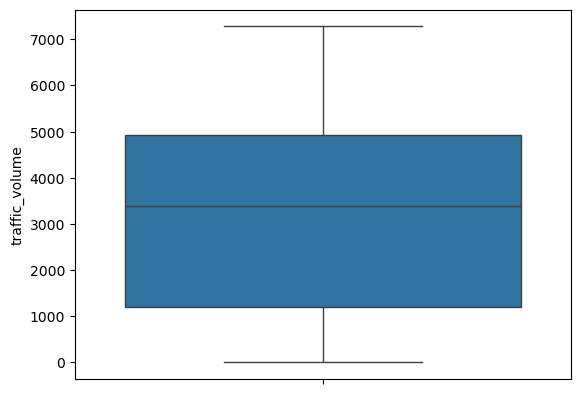

In [14]:
sns.boxplot(data=df['traffic_volume']);

### Forecasting

In [15]:
df_clean = df[['date_time', 'traffic_volume']]

df_clean.head()

,date_time,traffic_volume
0,2012-10-02 09:00:00,5545
1,2012-10-02 10:00:00,4516
2,2012-10-02 11:00:00,4767
3,2012-10-02 12:00:00,5026
4,2012-10-02 13:00:00,4918


In [16]:
df_clean = df_clean.set_index('date_time')

df_clean.head()

,traffic_volume
date_time,
2012-10-02 09:00:00,5545
2012-10-02 10:00:00,4516
2012-10-02 11:00:00,4767
2012-10-02 12:00:00,5026
2012-10-02 13:00:00,4918


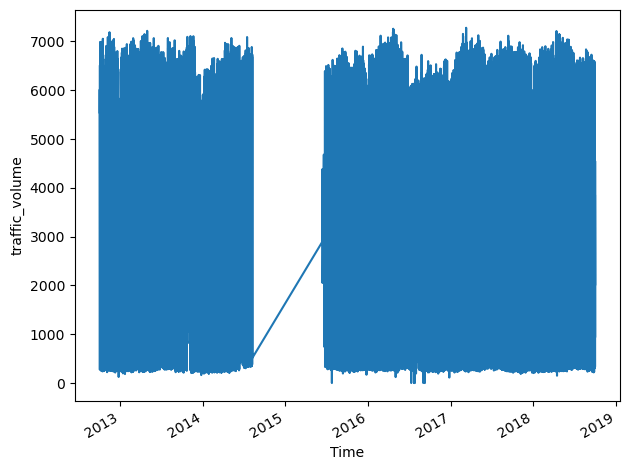

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(df_clean['traffic_volume'])
ax.set_xlabel('Time')
ax.set_ylabel('traffic_volume')

fig.autofmt_xdate()

plt.tight_layout()

> _When plotting our first graph, we noticed a lack of data for the year 2015; this could negatively affect our predictions. Let's select only the last 3 years, 2016, 2017, 2018. Even so, we will have enough data for our prediction._

In [18]:
filtered_2015 = df.loc[(df['date_time'] > '2015-01-01') & (df['date_time'] < '2016-01-01')]

filtered_2015.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
15971,NaN,287.586,0.0,0.0,92,Rain,light rain,2015-06-11 20:00:00,2886
15972,NaN,297.543,0.0,0.0,0,Clear,Sky is Clear,2015-06-12 18:00:00,4380
15973,NaN,292.061,0.0,0.0,8,Clear,sky is clear,2015-06-12 20:00:00,3095
15974,NaN,292.061,0.0,0.0,8,Clear,sky is clear,2015-06-12 21:00:00,3299
15975,NaN,294.840,0.0,0.0,76,Clouds,broken clouds,2015-06-13 21:00:00,3040


In [19]:
filtered_2015.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
20339,NaN,264.83,0.0,0.0,90,Snow,light snow,2015-12-31 15:00:00,5747
20340,NaN,264.89,0.0,0.0,90,Snow,light snow,2015-12-31 16:00:00,5467
20341,NaN,265.32,0.0,0.0,90,Snow,light snow,2015-12-31 19:00:00,3576
20342,NaN,265.51,0.0,0.0,75,Snow,light snow,2015-12-31 21:00:00,2768
20343,NaN,265.78,0.0,0.0,75,Snow,light snow,2015-12-31 23:00:00,1802


> _There are 6 months of unrecorded data missing._

In [20]:
dataFrame_filtered = df.loc[(df['date_time'] > '2015-12-31 23:00:00	')]

dataFrame_filtered.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
20344,New Years Day,265.94,0.0,0.0,90,Haze,haze,2016-01-01 00:00:00,1513
20345,New Years Day,265.94,0.0,0.0,90,Snow,light snow,2016-01-01 00:00:00,1513
20346,NaN,266.00,0.0,0.0,90,Snow,light snow,2016-01-01 01:00:00,1550
20347,NaN,266.01,0.0,0.0,90,Snow,light snow,2016-01-01 03:00:00,719
20348,NaN,264.80,0.0,0.0,90,Clouds,overcast clouds,2016-01-01 04:00:00,533


In [21]:
dataFrame_filtered.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [22]:
df_clean = dataFrame_filtered.drop_duplicates(subset='date_time', keep="last")

df_clean.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
20345,New Years Day,265.94,0.0,0.0,90,Snow,light snow,2016-01-01 00:00:00,1513
20346,NaN,266.00,0.0,0.0,90,Snow,light snow,2016-01-01 01:00:00,1550
20347,NaN,266.01,0.0,0.0,90,Snow,light snow,2016-01-01 03:00:00,719
20348,NaN,264.80,0.0,0.0,90,Clouds,overcast clouds,2016-01-01 04:00:00,533
20349,NaN,264.38,0.0,0.0,90,Clouds,overcast clouds,2016-01-01 05:00:00,586


In [23]:
df_clean.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [24]:
df_clean = df_clean[['date_time', 'traffic_volume']]

df_sample = df_clean[['date_time', 'traffic_volume']]

df_clean.head()

,date_time,traffic_volume
20345,2016-01-01 00:00:00,1513
20346,2016-01-01 01:00:00,1550
20347,2016-01-01 03:00:00,719
20348,2016-01-01 04:00:00,533
20349,2016-01-01 05:00:00,586


In [25]:
df_clean.shape

(23084, 2)

In [26]:
df_clean = df_clean.set_index('date_time')

df_clean.head()

,traffic_volume
date_time,
2016-01-01 00:00:00,1513
2016-01-01 01:00:00,1550
2016-01-01 03:00:00,719
2016-01-01 04:00:00,533
2016-01-01 05:00:00,586


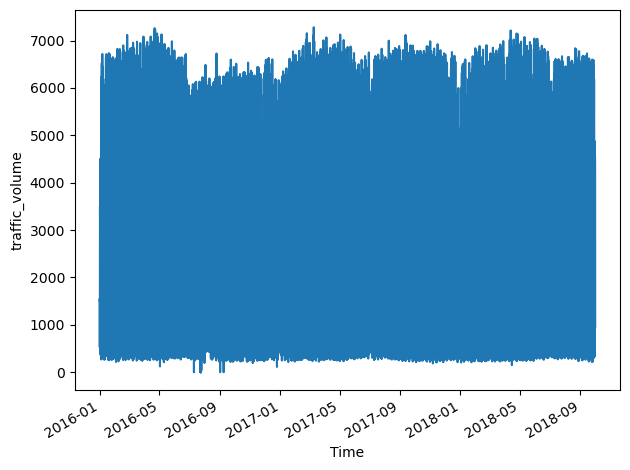

In [27]:
fig, ax = plt.subplots()
ax.plot(df_clean['traffic_volume'])
ax.set_xlabel('Time')
ax.set_ylabel('traffic_volume')

fig.autofmt_xdate()

plt.tight_layout()

> _Since we have 23,000 hourly samples, the graph is difficult to interpret. We will resample the data by monthly to see if we can gather more information._

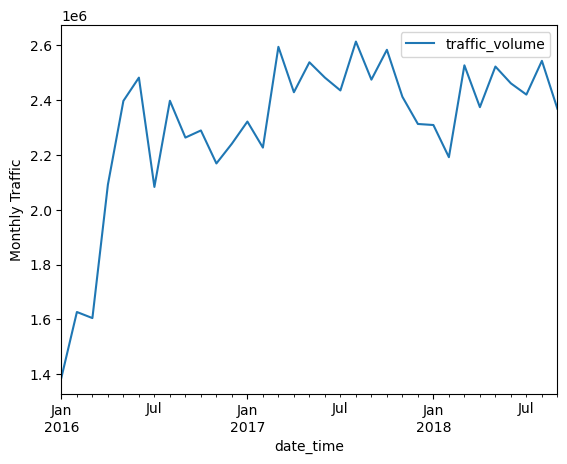

In [28]:
monthly = df_clean.resample('ME').sum()
monthly.plot(style=['-'])
plt.ylabel('Monthly Traffic');

In [29]:
monthly.head()

,traffic_volume
date_time,
2016-01-31,1387843
2016-02-29,1626991
2016-03-31,1604805
2016-04-30,2091544
2016-05-31,2396927


> _It appears the series isn't stationary, as it shows a growth trend followed by a decline, then a rise again, and then a stable trend. and it seems to have a seasonality._

In [30]:
from statsmodels.tsa.stattools import adfuller

ADF = adfuller(monthly)
print(f'ADF Statistic: {ADF[0]}')
print(f'p-value: {ADF[1]}')

ADF Statistic: -2.6573462620390527
p-value: 0.08171448516187457


> _For a series to be stationary, the ADF statistic must be a large negative number, and the p-value must be less than 0.05. The result don't meets the requirements. Therefore, our series is no-stationary._

> _Okay, but we used a monthly sample; let's take a small interval from the original dataset and check again._

In [31]:
df_small_interval = df_clean[['traffic_volume']]['2017-01-01 00:00:00':'2017-01-31 23:00:00']

In [32]:
df_small_interval.head()

,traffic_volume
date_time,
2017-01-01 00:00:00,1848
2017-01-01 01:00:00,1806
2017-01-01 02:00:00,1211
2017-01-01 03:00:00,794
2017-01-01 04:00:00,500


In [33]:
df_small_interval.shape

(744, 1)

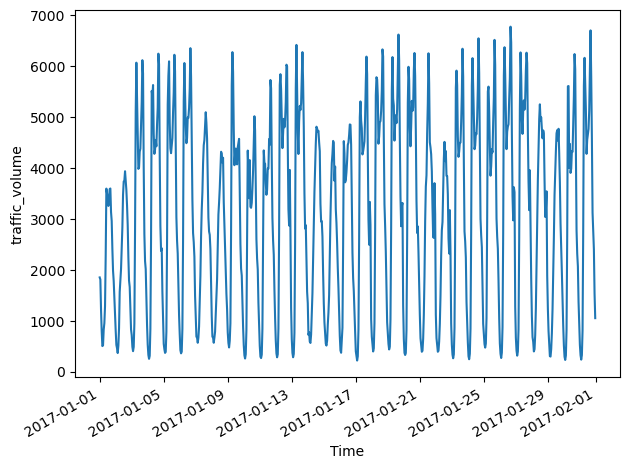

In [34]:
fig, ax = plt.subplots()
ax.plot(df_small_interval['traffic_volume'])
ax.set_xlabel('Time')
ax.set_ylabel('traffic_volume')

fig.autofmt_xdate()

plt.tight_layout()

In [35]:
ADF = adfuller(df_small_interval)
print(f'ADF Statistic: {ADF[0]}')
print(f'p-value: {ADF[1]}')

ADF Statistic: -3.812368094844145
p-value: 0.002783278053618346


> _Looking at the graph and analyzing the values ​​of ADF (negative value) and p-value (< 0.05), it appears that our series is stationary._

In [36]:
df_clean.head()

,traffic_volume
date_time,
2016-01-01 00:00:00,1513
2016-01-01 01:00:00,1550
2016-01-01 03:00:00,719
2016-01-01 04:00:00,533
2016-01-01 05:00:00,586


> _We will apply ADF to the complete dataset and plot ACF and PACF to analyze and obtain more information._

In [37]:
ADF = adfuller(df_clean)
print(f'ADF Statistic: {ADF[0]}')
print(f'p-value: {ADF[1]}')

ADF Statistic: -19.293283303079715
p-value: 0.0


 > _With a large negative ADF statistic of -19.29 and a p-value of 0.0, which is smaller than 0.05, we can conclude that our series is stationary._

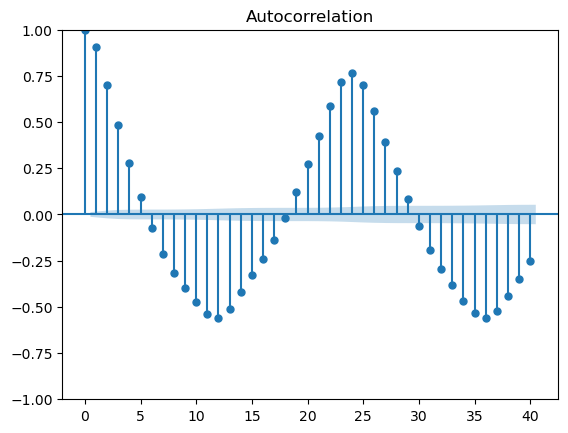

In [38]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_clean.squeeze(), lags=40);

> _It appears that our data is seasonal, as the ACF chart displays cyclical patterns._

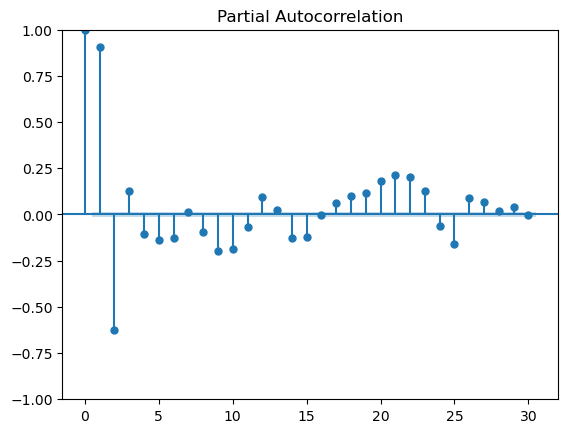

In [39]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df_clean, lags=30);

> _So far, both graphs exhibit a sinusoidal pattern, providing little information. Both the ACF and PACF plots fail to show a clear boundary between significant and non-significant coefficients. Therefore we may be looking at an ARMA pattern - autoregressive moving average._

In [40]:


df_sample = df_sample.tail(10000)

In [41]:
df_sample.head()

,date_time,traffic_volume
36069,2017-08-09 00:00:00,676
36070,2017-08-09 01:00:00,395
36071,2017-08-09 02:00:00,306
36072,2017-08-09 03:00:00,381
36073,2017-08-09 04:00:00,949


In [42]:
df_sample.tail()

,date_time,traffic_volume
48199,2018-09-30 19:00:00,3543
48200,2018-09-30 20:00:00,2781
48201,2018-09-30 21:00:00,2159
48202,2018-09-30 22:00:00,1450
48203,2018-09-30 23:00:00,954


In [43]:
df_sample.shape

(10000, 2)

In [44]:
df_sample = df_sample.reset_index(drop=True)

In [45]:
df_sample.head()

,date_time,traffic_volume
0,2017-08-09 00:00:00,676
1,2017-08-09 01:00:00,395
2,2017-08-09 02:00:00,306
3,2017-08-09 03:00:00,381
4,2017-08-09 04:00:00,949


In [46]:
df_sample.tail()

,date_time,traffic_volume
9995,2018-09-30 19:00:00,3543
9996,2018-09-30 20:00:00,2781
9997,2018-09-30 21:00:00,2159
9998,2018-09-30 22:00:00,1450
9999,2018-09-30 23:00:00,954


> _Let's separate our data into training and testing sets. Since our data is separated by hours and we need to predict traffic every hour for the next two weeks, we have a total of 2 weeks, which equals 336 hours. We decided to use a smaller sample for better understanding._ 

In [47]:
#df_sample = df_sample.set_index('date_time')
train = df_sample[['traffic_volume']][:-336] # 9664

test = df_sample[['traffic_volume']][-336:] # there are 336 hours in two week - 336

print(len(train))
print(len(test))

train.head()

9664
336


,traffic_volume
0,676
1,395
2,306
3,381
4,949


> _Let's visualize our train set and test set_

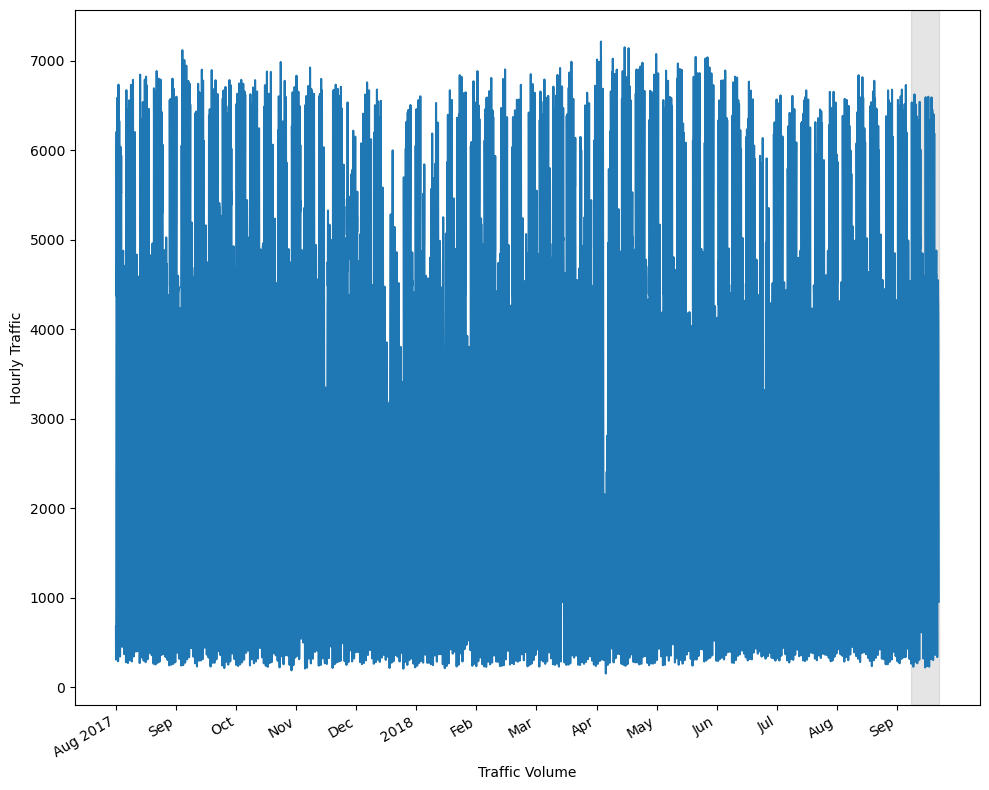

In [48]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(df_sample['traffic_volume'])
ax.set_xlabel('Traffic Volume')
ax.set_ylabel('Hourly Traffic')
ax.axvspan(9664, 10000, color='#808080', alpha=0.2)

plt.xticks(np.arange(0, 10000, 730),['Aug 2017', 'Sep', 'Oct', 'Nov', 'Dec', '2018', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'])

fig.autofmt_xdate()
plt.tight_layout()

> _Le's use a function to fit different ARMA(p,q) models and compute the AIC result for select the best model_

In [49]:
from typing import Union
from statsmodels.tsa.statespace.sarimax import SARIMAX

def ARMA(endog: Union[pd.Series, list], order_list: list) -> pd.DataFrame:

    results = []
    for order in (order_list):
        
            model = SARIMAX(endog, order=(order[0], 0, order[1]), simple_differencing=False).fit(disp=False)
            aic = model.aic
            results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']

    #Sort in ascending order
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    return result_df

In [60]:
import warnings
warnings.filterwarnings('ignore')

from itertools import product

p = range(0, 10, 1)
q = range(0, 10, 1)

order_list = list(product(p, q))

result_df = ARMA(train['traffic_volume'], order_list)
result_df

# took 25min for all AIC results

,"(p,q)",AIC
0,"(3, 9)",148942.376734
1,"(6, 9)",149189.516622
2,"(9, 7)",149278.976671
3,"(8, 7)",149331.477099
4,"(9, 8)",149350.991822
...,...,...
95,"(0, 9)",165604.753874
96,"(0, 2)",165942.699893
97,"(0, 8)",169618.987537
98,"(0, 1)",174897.829747


>_Looking at the resulting dataframe, we can see that the model with the lowest AIC indicates that the model to be selected is ARMA(3,4)._

In [61]:
model = SARIMAX(train['traffic_volume'], order=(3,0,9), simple_differencing=False)

model_fit = model.fit(disp=False)

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         traffic_volume   No. Observations:                 9664
Model:               SARIMAX(3, 0, 9)   Log Likelihood              -74458.188
Date:                Wed, 14 Jan 2026   AIC                         148942.377
Time:                        14:19:03   BIC                         149035.667
Sample:                             0   HQIC                        148974.009
                               - 9664                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5112      0.003    539.536      0.000       1.506       1.517
ar.L2         -1.4970      0.004   -336.020      0.000      -1.506      -1.488
ar.L3          0.9853      0.003    364.841      0.0

>_Now let's analyze what the Q-Q plot, as well as the other plots, tells us._

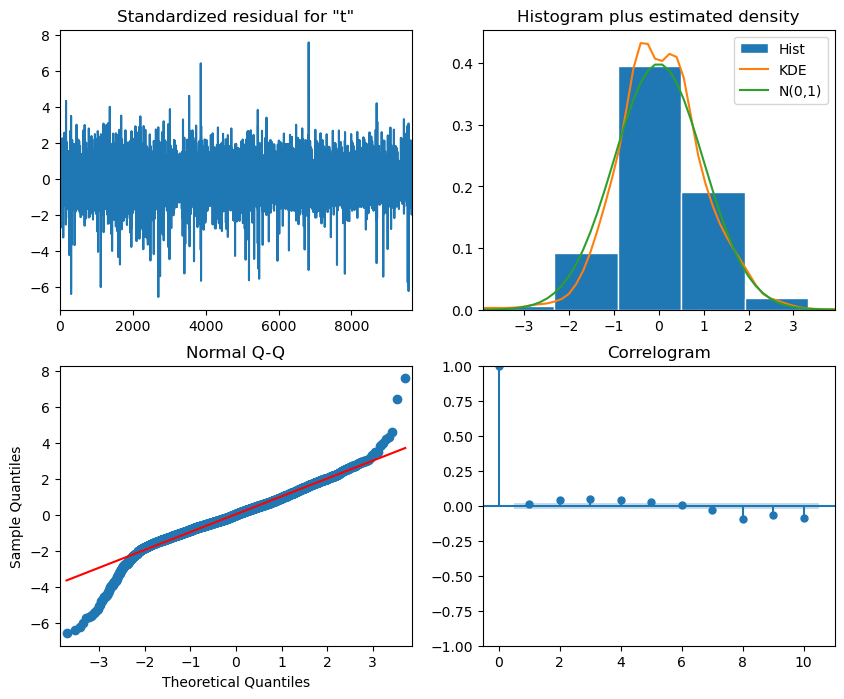

In [62]:
model_fit.plot_diagnostics(figsize=(10, 8));

> _Looking at the graphs, it seems we have a normal distribution. The Q-Q plot shows that  is very close to y=x in some parts, but it appears that the ACF plot is still showing some autocorrelation afterlag 0._

In [63]:
from statsmodels.stats.diagnostic import acorr_ljungbox

residuals = model_fit.resid


pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))['lb_pvalue']

print(pvalue)

1     2.234802e-01
2     3.132232e-04
3     2.260424e-08
4     4.024366e-11
5     4.534533e-12
6     1.320641e-11
7     4.866319e-13
8     2.243158e-30
9     3.134703e-38
10    2.271049e-52
Name: lb_pvalue, dtype: float64


>_Since the returned values ​​are not greater than 0.05, we cannot conclude that our residuals are in fact uncorrelated._